#TEXT MINING for BEGINNER
##**Day11. 실전 텍스트 분석하기 : 단어 빈도 분석, 연관단어분석**

###**1. 단어 빈도 분석: 문서에서 단어의 출현빈도 계산하기**

1.1. 샘플 데이터 불러오기

In [1]:
article_list = []
file_path = "/content/drive/MyDrive/2024_2학기/ESAA OB/필사 과제/article_sample.txt"

f = open(file_path, encoding="utf-8")
for line in f:
    col=line.strip().split("\t")
    content=col[4]
    article_list.append(content)
f.close()

print("총 기사 수 :", len(article_list))

총 기사 수 : 100


In [2]:
print("기사 샘플:")
print(article_list[3][:1000])

기사 샘플:
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

1.2. 기사 문장을 형태소 단위로 분리하기

In [4]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 38.6 MB/s eta 0:00:00


In [5]:
from konlpy.tag import Kkma
kkma = Kkma()

text = "꼬꼬마 형태소 분석기를 불러옵니다."
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [6]:
tag_sentence_list = []
stop_list =["카페","카페규정"]
pos_list = ["NNG","NNP"]

now=0
for article in article_list:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) >1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

1.3. 형태소 단위로 출현빈도 카운트하기

In [7]:
word_frequency = {}

for tag_sentence in tag_sentence_list:
    for word in tag_sentence:
        if word in word_frequency.keys():
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

word_count =[]
for word, freq in word_frequency.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

금융	873
금리	797
비트	554
부동산	519
대출	505
은행	384
기준	265
시장	190
화폐	185
자산	174
투자	170
당국	149
암호	148
신탁	133
그림자	133
기자	130
거래	120
신용	116
관련	107
정부	103


1.4. 단어빈도를 활용해 워드 클라우드 그리기

In [8]:
!pip install wordcloud

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [13]:
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
for tag_sentence in tag_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
    # random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
    import random
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

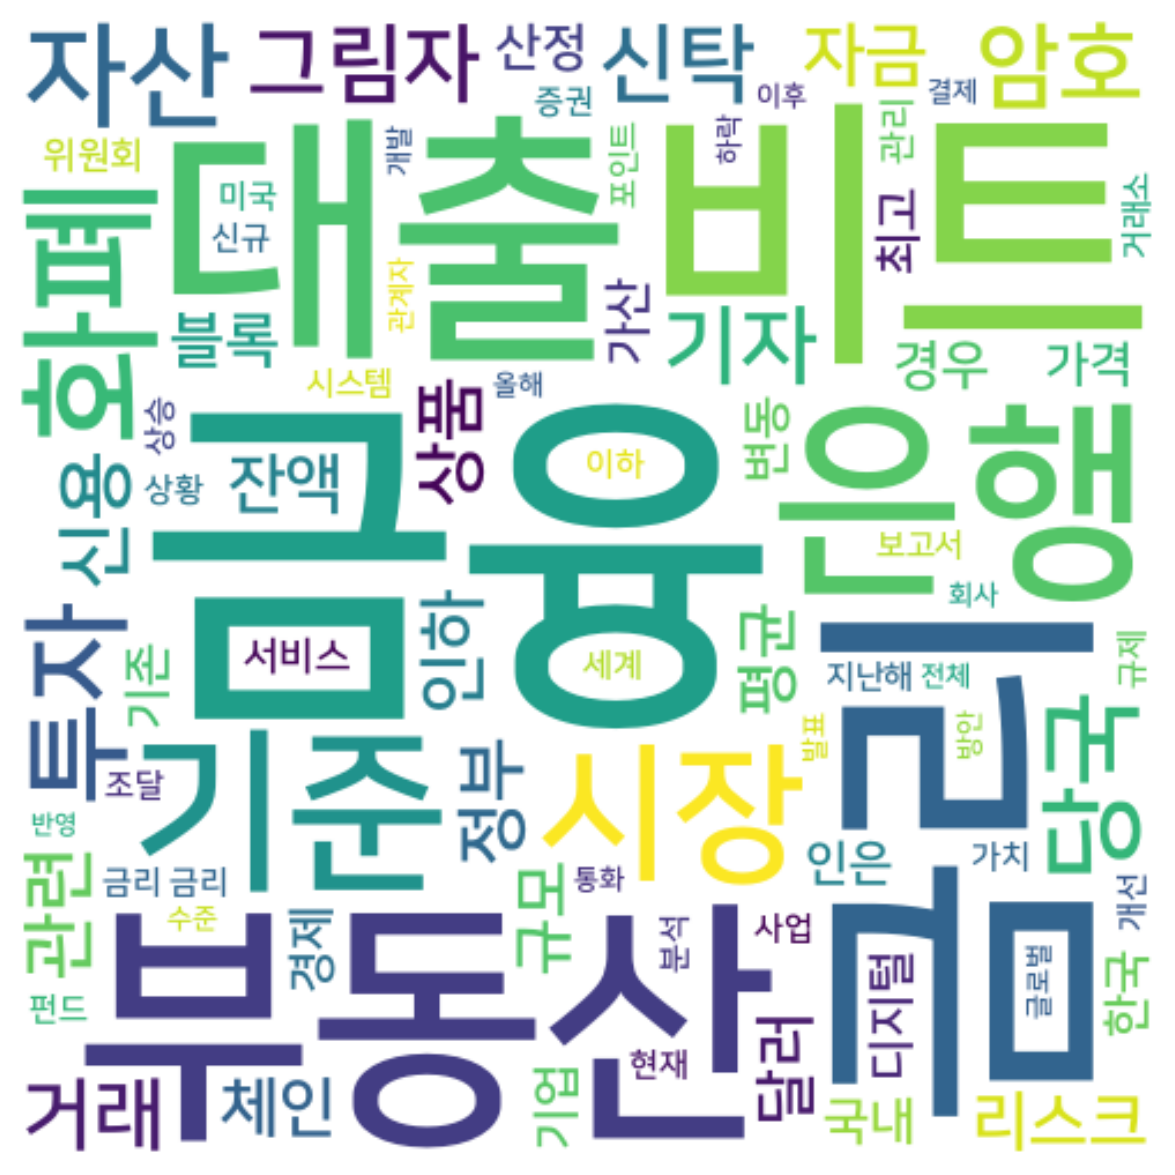

In [15]:
font_path="/content/drive/MyDrive/2024_2학기/ESAA OB/필사 과제/NanumSquareB.otf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

###**2. 연관어분석: 문서에서 단어 사이의 동시출현빈도 계산하기**
2.3. 단어 기준으로 주변단어 출현빈도 카운트하기

In [17]:
keyword = "금리"

co_frequency = {}

for tag_sentence in tag_sentence_list:
    if keyword not in tag_sentence:
        continue
    index = tag_sentence.index(keyword)
    window =3
    co_word_list = tag_sentence[index-window:index+window+1]
    for word in co_word_list:
        if word in co_frequency.keys():
            co_frequency[word] += 1
        else:
            co_frequency[word] = 1

co_word_list = []
for i,j in co_frequency.items():
    co_word_list.append((i,j))
co_word_list.sort(key=lambda elem: elem[1], reverse=True)

for word, frequency in co_word_list[:10]:
    print(word + "\t" + str(frequency))

금리	34
은행	8
금융	8
가산	5
대출	5
기준	4
평균	3
자금	3
인하	3
경우	2


2.4. 연관단어의 동시출현빈도를 활용해 워드 클라우드 그리기

In [18]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [20]:
noun_string=""

noun_list=[]
for word, frequency in co_word_list[:10]:
    for i in range(frequency):
        noun_list.append(word)

import random
random.shuffle(noun_list)

for word in noun_list:
    noun_string += word + " "

noun_string = noun_string.strip()

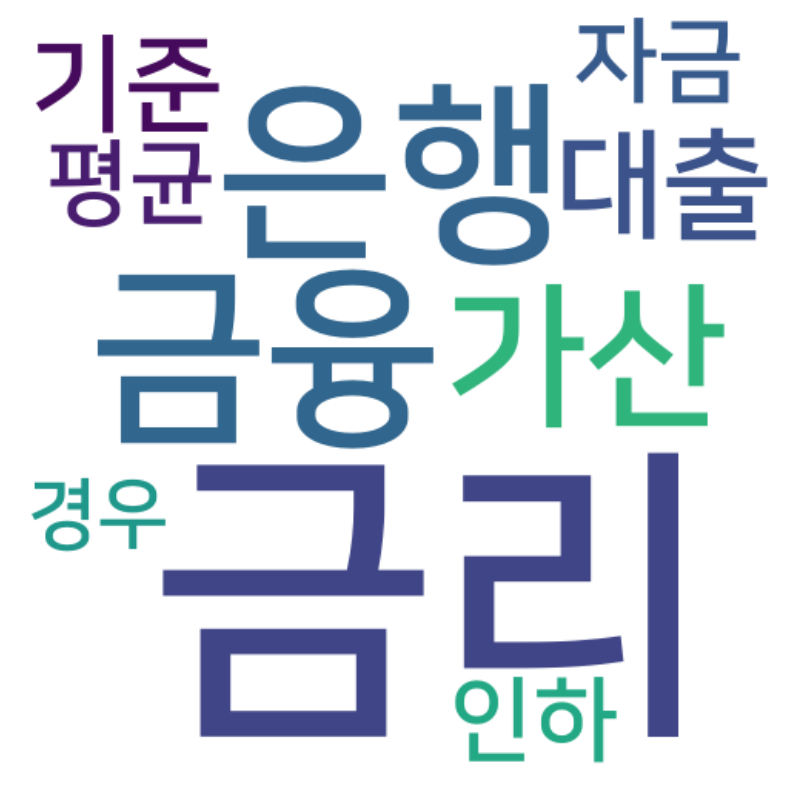

In [21]:
font_path="/content/drive/MyDrive/2024_2학기/ESAA OB/필사 과제/NanumSquareB.otf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=20             #최소 글자 크기
max_font_size=200             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()